In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import SGD
import numpy as np

In [2]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)) # flattens the data
])

In [3]:
batch_size = 64

trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transforms)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transforms)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [4]:
trainset[0][0].shape # input features

torch.Size([784])

In [5]:
# No. of samples in trainset
len(trainloader) * batch_size

60032

In [6]:
# No. of samples in testset
len(testloader) * batch_size

10048

In [7]:
class SoftmaxReg(nn.Module):
    def __init__(self, x_dim, y_dim):
        super(SoftmaxReg,self).__init__()
        self.linear = nn.Linear(x_dim,y_dim)
    
    def forward(self,X):
        X = self.linear(X)
        return X

In [8]:
x_dim = trainset[0][0].shape[0]
y_dim = 10
model = SoftmaxReg(x_dim,y_dim)
criterion = nn.CrossEntropyLoss()
epochs = 100
lr = 0.001
optimizer = SGD(model.parameters(),lr=lr)
losses = []
accuracy = []

In [9]:
for epoch in range(epochs):
    epoch_loss = 0
    for i ,(xi,yi)in enumerate(trainloader):

        output = model(xi)
        loss = criterion(output,yi)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

Epoch 1/30, Loss: 1.9092542606630305
Epoch 2/30, Loss: 1.3925526633953997
Epoch 3/30, Loss: 1.1238562828188003
Epoch 4/30, Loss: 0.9665084286793463
Epoch 5/30, Loss: 0.8644985505131516
Epoch 6/30, Loss: 0.7928672313436008
Epoch 7/30, Loss: 0.7396810311498418
Epoch 8/30, Loss: 0.6984286327669615
Epoch 9/30, Loss: 0.6654613566106317
Epoch 10/30, Loss: 0.6382714157610305
Epoch 11/30, Loss: 0.6156592705547174
Epoch 12/30, Loss: 0.5961418612870072
Epoch 13/30, Loss: 0.5793110483617925
Epoch 14/30, Loss: 0.5646853933392811
Epoch 15/30, Loss: 0.5516459522470991
Epoch 16/30, Loss: 0.5402865693576808
Epoch 17/30, Loss: 0.5297846625735765
Epoch 18/30, Loss: 0.5202838299688755
Epoch 19/30, Loss: 0.5117063342190501
Epoch 20/30, Loss: 0.5039154482421591
Epoch 21/30, Loss: 0.49664119969425935
Epoch 22/30, Loss: 0.49025337499723254
Epoch 23/30, Loss: 0.4838950328195273
Epoch 24/30, Loss: 0.4780852317428792
Epoch 25/30, Loss: 0.47280357658926614
Epoch 26/30, Loss: 0.4676935147406704
Epoch 27/30, Loss:

Text(0, 0.5, 'Loss')

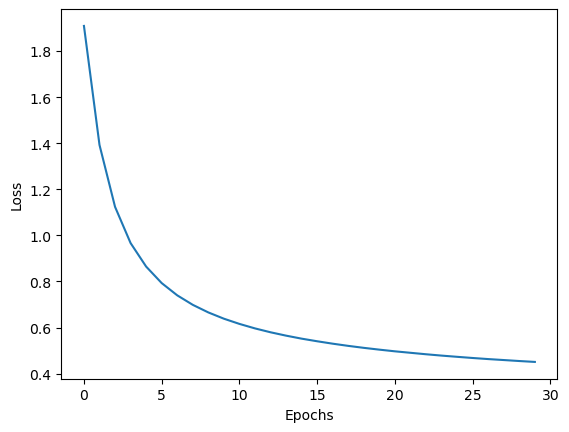

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses,label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [12]:
PATH = './mnist-softmax-reg.pth'
torch.save(model.state_dict(), PATH)

In [11]:
from sklearn.metrics import classification_report
model.eval()
y_pred = np.array([])
y_true = np.array([])
with torch.no_grad(): 
    for xi, yi in testloader:
        output = model(xi)
        _,y_pred_tensor = torch.max(output,1)
        y_pred = np.hstack((y_pred,y_pred_tensor.numpy()))
        y_true = np.hstack((y_true,yi.numpy()))

print(classification_report(y_pred=y_pred,y_true=y_true))


              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       980
         1.0       0.94      0.97      0.95      1135
         2.0       0.90      0.84      0.87      1032
         3.0       0.87      0.88      0.88      1010
         4.0       0.88      0.91      0.90       982
         5.0       0.87      0.79      0.83       892
         6.0       0.91      0.93      0.92       958
         7.0       0.91      0.88      0.89      1028
         8.0       0.83      0.85      0.84       974
         9.0       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

